In [69]:
from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import MolDrawing, DrawingOptions

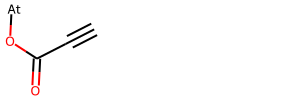

In [56]:
extracted_smi = "C#CC(=O)OR"

sub_smi = extracted_smi.replace("R", "[At]")           # using the element At as a placeholder to validify SMILES
m = Chem.MolFromSmiles(sub_smi)
img = Draw.MolsToGridImage([m], subImgSize=(100, 100))
display(img)

In [57]:
for i, atom in enumerate(m.GetAtoms()):
    print(f"{i}: {atom.GetSymbol()}", end=", ")

0: C, 1: C, 2: C, 3: O, 4: O, 5: At, 

In [58]:
atom = m.GetAtomWithIdx(5)
print(atom.GetSymbol())

At


In [59]:
bond = atom.GetBonds()[0]                      # assuming R is singly bonded to the other atom
adjacent_idx = bond.GetOtherAtomIdx(5)         # getting the idx of the other atom
print(adjacent_idx)

4


C#CC([O])=O


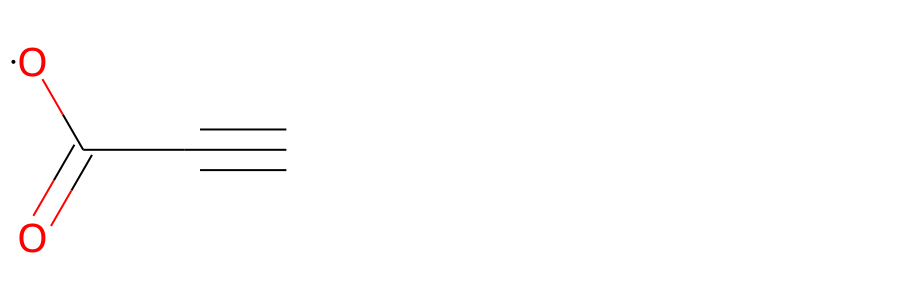

In [61]:
mw = Chem.RWMol(m)     # convert to editable molecule
mw.RemoveAtom(5)

adjacent_atom = mw.GetAtomWithIdx(adjacent_idx)
adjacent_atom.SetNumRadicalElectrons(1)

new_smi = Chem.MolToSmiles(mw)     # let's not sanitize mw for now so that any error will be very obvious
print(new_smi)

img = Draw.MolsToGridImage([mw], subImgSize=(300,300))
display(img)           # the dot indicate that it's a radical (with a free electron to bond to anything after)

So far we've shown that we can break the R-C bond in R-containing invalid SMILES to the intermediate radical/synthon, while keeping the index of the adjacent atom.
Let's now attach some other actual group to it.

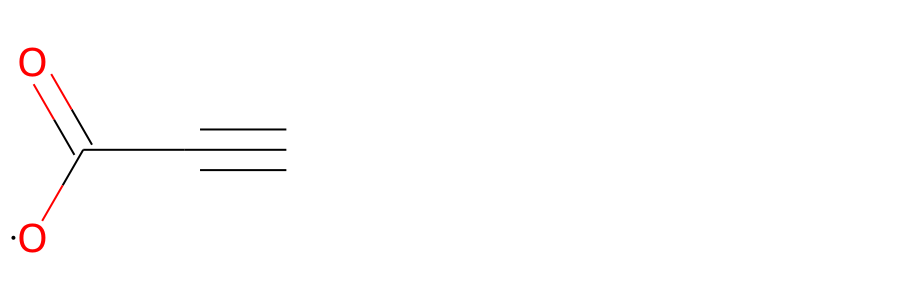

In [63]:
synthon_smi = "C#CC([O])=O"
m = Chem.MolFromSmiles(synthon_smi)
img = Draw.MolsToGridImage([m], subImgSize=(300,300))
display(img)

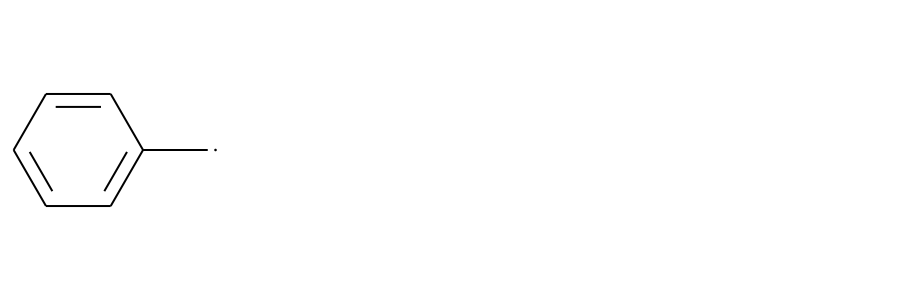

In [68]:
R_smi = "[CH2]c1ccccc1"      # benzyl
mR = Chem.MolFromSmiles(R_smi)
img = Draw.MolsToGridImage([mR], subImgSize=(300,300))
display(img)

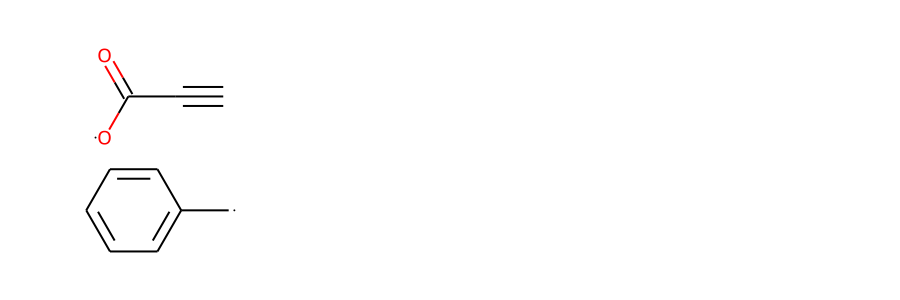

In [77]:
combo = Chem.CombineMols(m, mR)
img = Draw.MolsToGridImage([combo], subImgSize=(300,300))
display(img)

In [84]:
for i, atom in enumerate(combo.GetAtoms()):        # we can easily get the atom numbers
    if atom.GetNumRadicalElectrons() == 1:
        print(i)
        atom.SetNumRadicalElectrons(0)

3
5


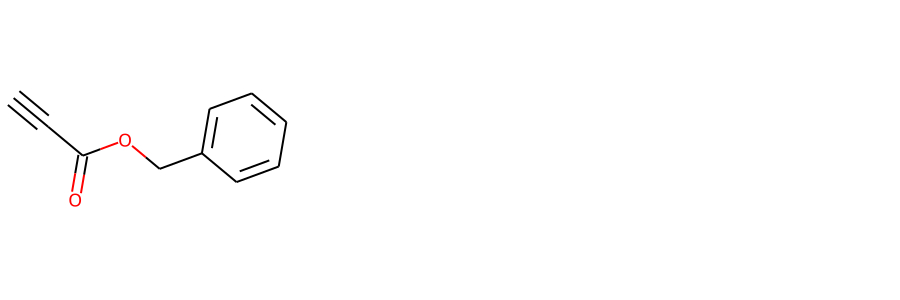

In [85]:
edcombo = Chem.RWMol(combo)
edcombo.AddBond(3, 5, order=Chem.rdchem.BondType.SINGLE)
img = Draw.MolsToGridImage([edcombo], subImgSize=(300,300))
display(img)